# - Caso de Análisis Dataset Students -



#### =============================================
Este cuaderno comprende el análisis del dataset "Students Perfeormance in Exams" por medio de diferentes visualizaciones así como la construcción de un modelo predictivo que permita estimar el rendimiento en el curso de matemáticas.



Elaborado Por: Ronaldo Vindas Barboza 


Junio, 2024

#### =============================================

In [16]:
# ======================= Importación de Bibliotecas ======================= #
import pandas as pd                                                                     #Manejo de Dataframes
import numpy as np                                                                      #Manejo de Matrices        
from math import sqrt                                                                   #Funciones matemáticas
import matplotlib.pyplot as plt                                                         #Creación de gráficos
import seaborn as sns                                                                   #Biblioteca que facilita uso de gráficos

from sklearn.preprocessing import MinMaxScaler                                          #Normalización de Dataframe
from sklearn.model_selection import train_test_split                                    #Manejo de Test y Training
from sklearn.linear_model import LinearRegression                                       #Regresión Lineal
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# ======================= Importación de Dataset ======================= #
dataframe = pd.read_csv('StudentsPerformance.csv')                                                         #Creación de DataFrame a partir de un archivo CSV.


dataframe = dataframe.sample(frac = 1)                                                                     #Baraja de filas


#df_Training = dataframe.iloc[:800]                                                                         #Se divide el Training Set correspondiente al 80% de las filas del Dataset Original
#df_Testing = dataframe.iloc[801:]                                                                          #Se divide el Testing Set correspondiente al 20% de las filas del Dataset Original


dataframe.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### =============================================
Inicialmente, se observa que cinco de las ocho caracteristicas son categóricas, por lo que se realizan técnicas de Feature Engineering como One-Hot-Encoding para trasformar estos features de categóricos a númericos a coste de un pequeño incremento en la dimensionalidad del dataframe. De igual manera, se normalizarán los datos numéricos para que todos los valores de los features se encuentren en el rango de valores de 0 y 1. <br>
Adicionalmente, no se visualizan valores faltantes. Existe un valor cero, pero al tratarse del campo "math score" se deja pasar pues podría ser un resultado real.

#### =============================================

# - = Feature Engineering = - 

In [18]:
# ======================= One Hot Encoding ======================= #

#print(dataframe['gender'].unique())
#print(dataframe['race/ethnicity'].unique())
#print(dataframe['parental level of education'].unique())
#print(dataframe['lunch'].unique())
#print(dataframe['test preparation course'].unique())

categoricalFeatures = ['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']
numericFeatures = ['math score', 'reading score', 'writing score']
allFeatures = ['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course', 'math score', 'reading score', 'writing score']

oneHotEncodedDataframe = pd.get_dummies(dataframe, categoricalFeatures, dtype='int')                    #realiza el One-Hot-Encodinig
print(oneHotEncodedDataframe)


#scaler = MinMaxScaler()
#df[numeric_features] = scaler.fit_transform(df[numeric_features])


# ======================= Normalization ======================= #


scaler = MinMaxScaler()                                        #Inicializa Escalador
oneHotEncodedDataframe[numericFeatures] = scaler.fit_transform(oneHotEncodedDataframe[numericFeatures])             #Se normalizan valores numéricos

#df_Training = oneHotEncodedDataframe.iloc[:800]                                                                         #Se divide el Training Set correspondiente al 80% de las filas del Dataset Original
#df_Testing = oneHotEncodedDataframe.iloc[801:]                                                                          #Se divide el Testing Set correspondiente al 20% de las filas del Dataset Original



     math score  reading score  writing score  gender_female  gender_male  \
636          67             80             81              1            0   
91           27             34             36              0            1   
911          69             84             82              1            0   
858          52             49             46              0            1   
694          49             63             56              1            0   
..          ...            ...            ...            ...          ...   
310          73             76             80              1            0   
533          79             88             94              1            0   
834          58             50             45              0            1   
413          63             67             67              0            1   
372          74             74             72              0            1   

     race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C

In [19]:
# ======================= Análisis Estadístico de Datos ======================= #

oneHotEncodedDataframe.describe()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.660890,0.628542,0.645044,0.518000,0.482000,0.089000,0.190000,0.319000,0.262000,0.140000,0.222000,0.11800,0.196000,0.059000,0.226000,0.179000,0.355000,0.645000,0.358000,0.642000
std,0.151631,0.175906,0.168841,0.499926,0.499926,0.284886,0.392497,0.466322,0.439943,0.347161,0.415799,0.32277,0.397167,0.235743,0.418448,0.383544,0.478753,0.478753,0.479652,0.479652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.570000,0.506024,0.530556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.660000,0.638554,0.655556,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.770000,0.746988,0.766667,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


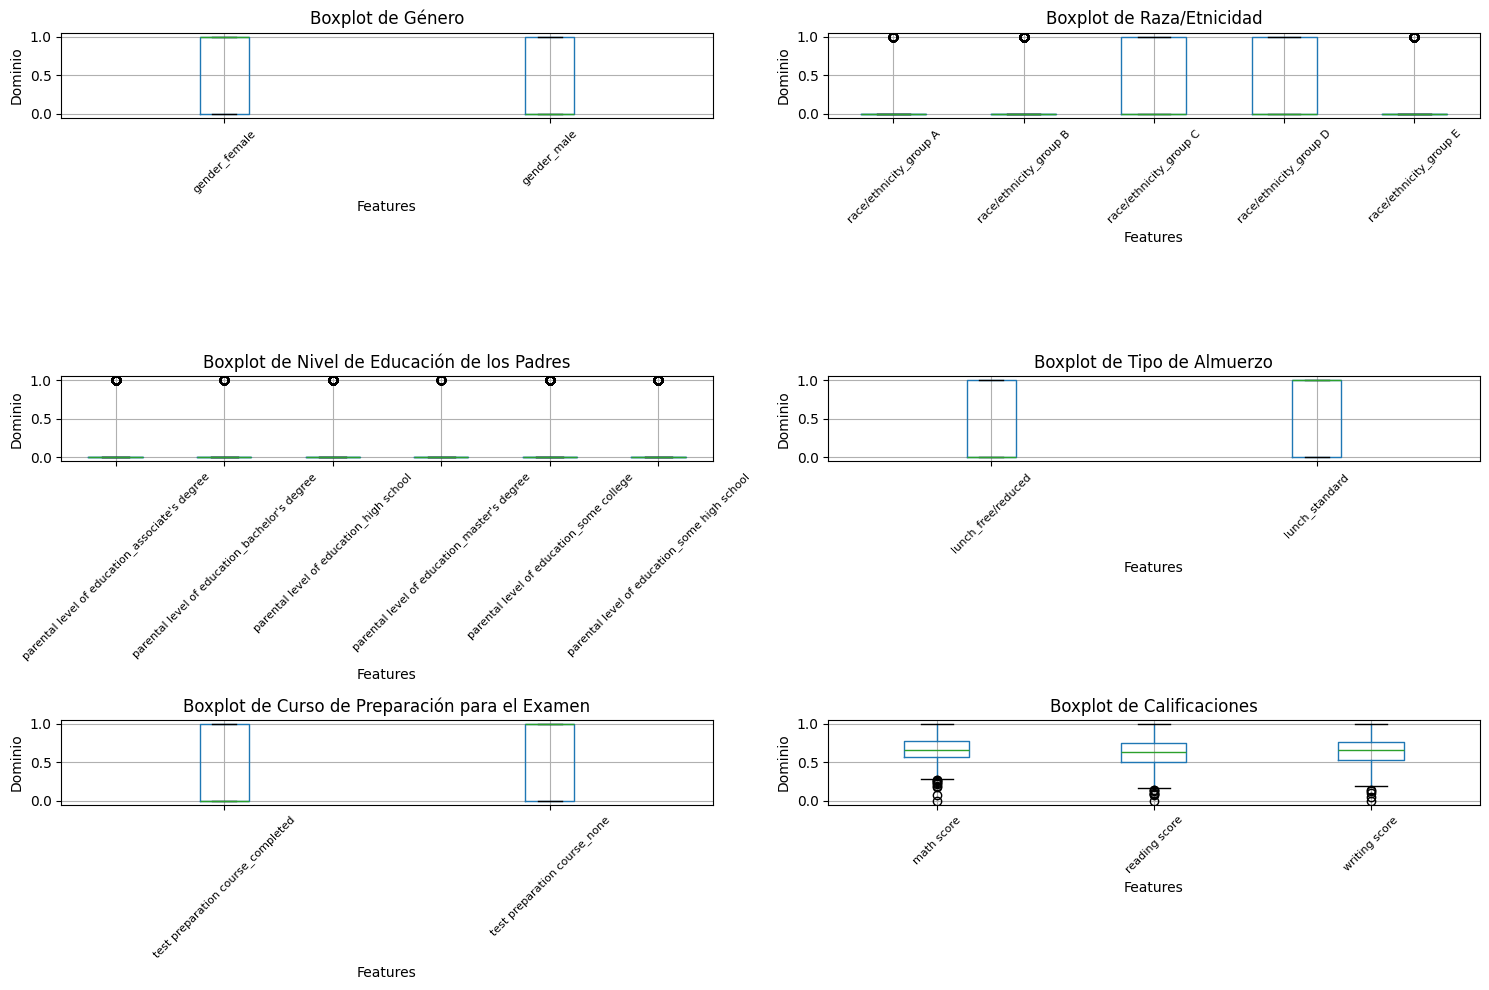

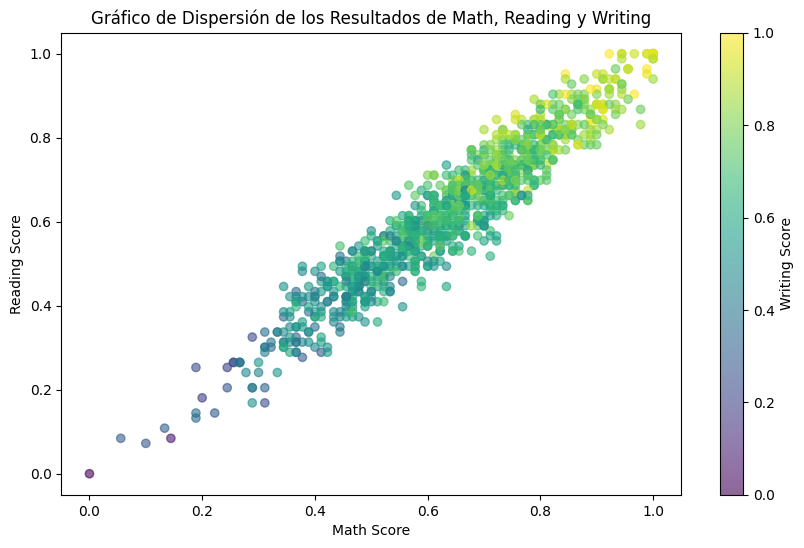

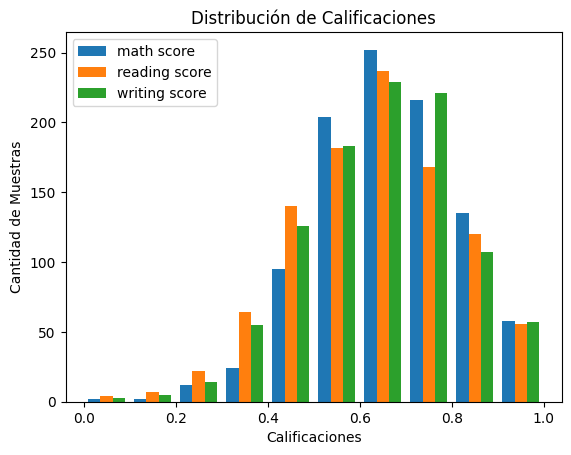

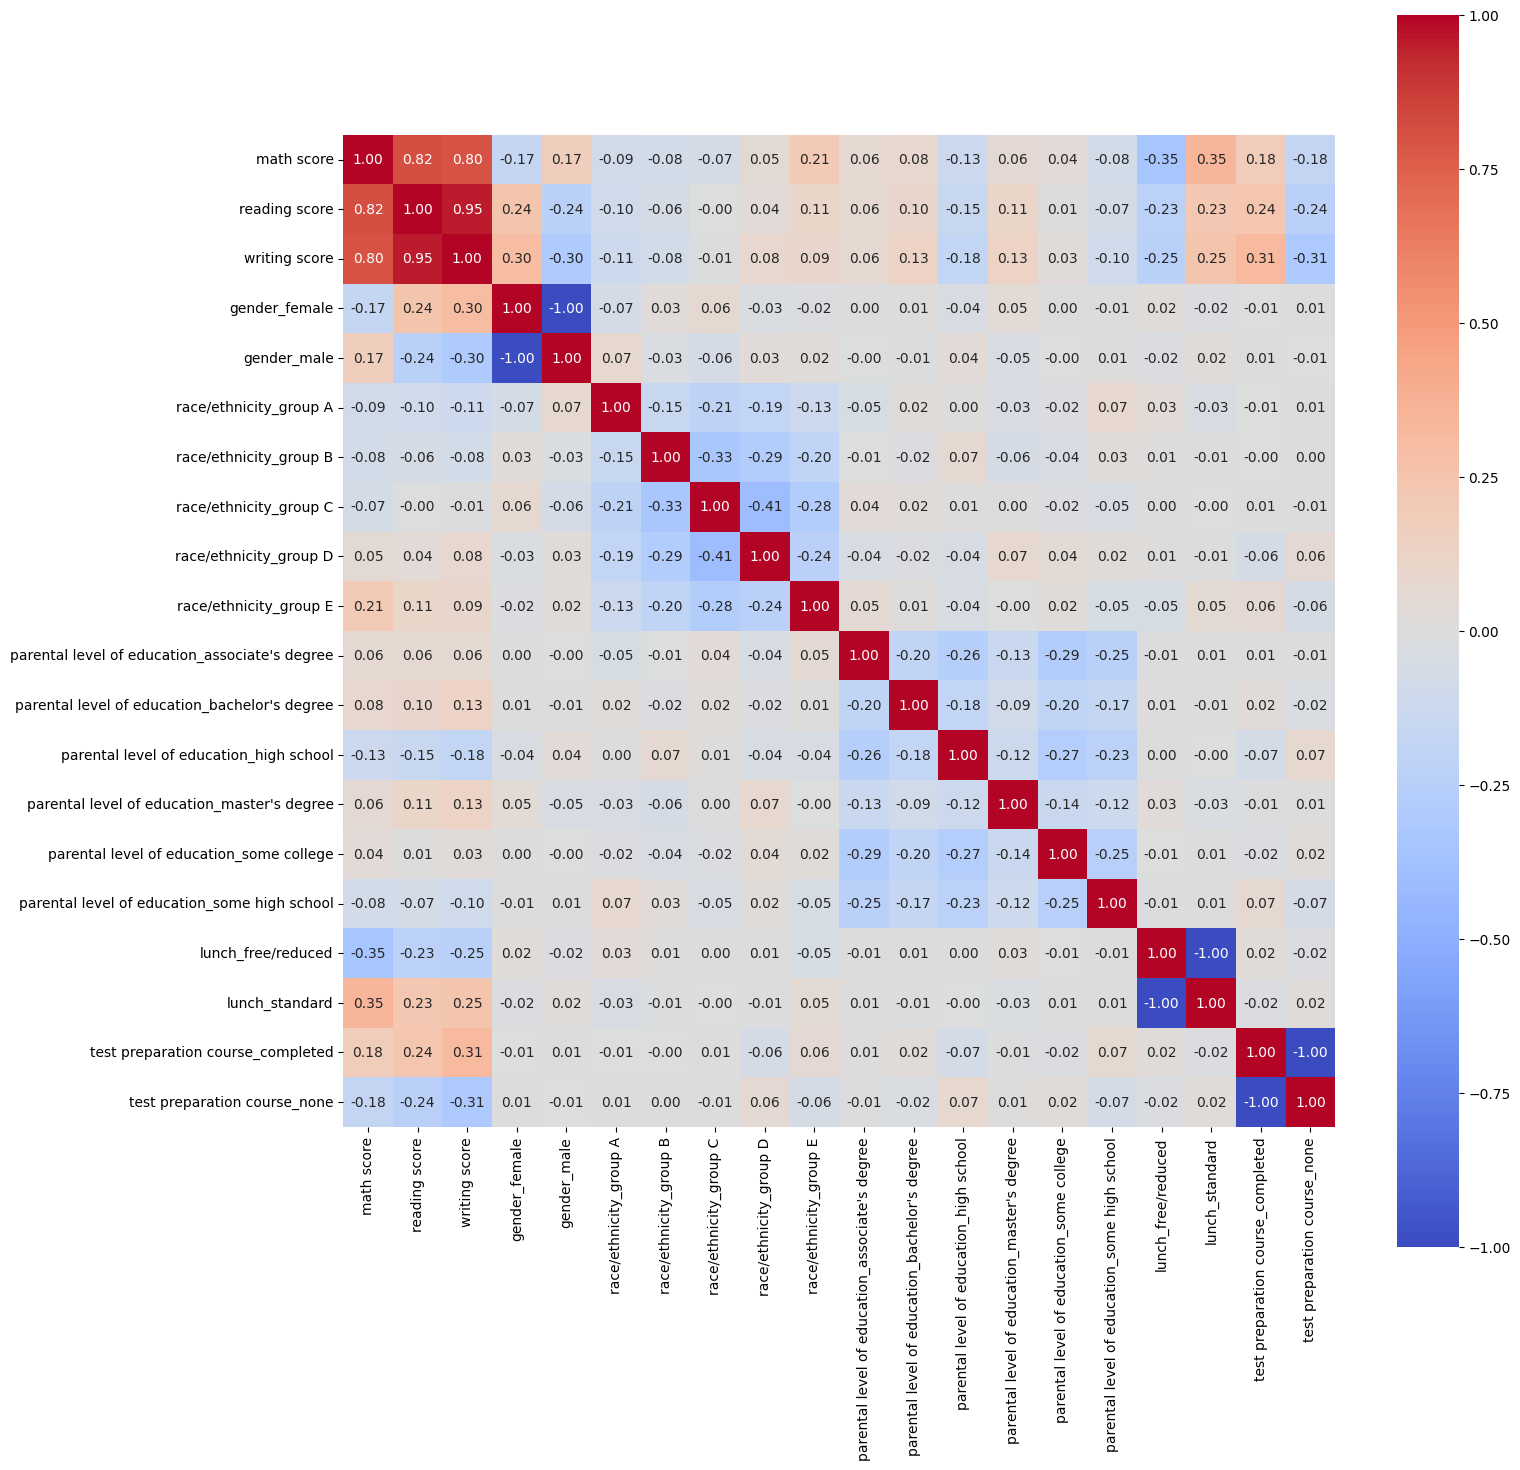

In [20]:

df = oneHotEncodedDataframe

#--->Gráfico BoxPlot

#Columnas de Dataframe tras One-Hot-Enconding

boxplotColumnsGender = ['gender_female','gender_male'] #, 'Outcome'
boxplotColumnsRace = ['race/ethnicity_group A','race/ethnicity_group B','race/ethnicity_group C','race/ethnicity_group D', 'race/ethnicity_group E'] #, 'Outcome'
boxplotColumnsEducation = ["parental level of education_associate's degree","parental level of education_bachelor's degree",
                            "parental level of education_high school","parental level of education_master's degree",
                            "parental level of education_some college","parental level of education_some high school"]
boxplotColumnsLunch = ['lunch_free/reduced','lunch_standard']
boxplotColumnsPreparation = ['test preparation course_completed','test preparation course_none']



fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))                                #Crea figura y sobre ella una matriz de plots

boxplot_data = [                                                                            #Lista de datos y títulos para cada plot
    (boxplotColumnsGender, 'Boxplot de Género'),
    (boxplotColumnsRace, 'Boxplot de Raza/Etnicidad'),
    (boxplotColumnsEducation, 'Boxplot de Nivel de Educación de los Padres'),
    (boxplotColumnsLunch, 'Boxplot de Tipo de Almuerzo'),
    (boxplotColumnsPreparation, 'Boxplot de Curso de Preparación para el Examen'),
    (numericFeatures, 'Boxplot de Calificaciones')
]


for ax, (columns, title) in zip(axes.flat, boxplot_data):                                   #Se itera por cada uno de los datos para plottear
    df[columns].boxplot(ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Features')
    ax.set_ylabel('Dominio')
    ax.tick_params(axis='x', labelsize=8, rotation=45)


#fig.delaxes(axes[2][1])                                                                    #Elimina subplot en esa posición de la matriz             

plt.tight_layout()


#---> Gráficos de Dispersión:


plt.figure(figsize=(10, 6))                                                             #Figura de plot
scatter = plt.scatter(df['writing score'], df['reading score'], c=df['math score'], cmap='viridis', alpha=0.6)

cbar = plt.colorbar(scatter)                                                            #Selección de paleta de colores
cbar.set_label('Writing Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')

plt.title('Gráfico de Dispersión de los Resultados de Math, Reading y Writing')

#scatter.grid(True) 

#--> Histogramas - Balanceo de Datos


data = [df['math score'],df['reading score'], df['writing score'] ]                                 #Agrupación de datos a plottear


fig, ax = plt.subplots()
ax.hist(data, label = numericFeatures)                                                              #Crea el histrograma, label etiqueta cada color del histrograma
plt.xlabel("Calificaciones")
plt.ylabel("Cantidad de Muestras")
plt.title('Distribución de Calificaciones')
plt.legend()

#--> Matriz de Correlación

correlationMatrix = df.corr()
threshold = 0
filteredCorrelation = correlationMatrix[(correlationMatrix >= threshold) | (correlationMatrix <= -threshold)]

plt.figure(figsize=(16, 16))
sns.heatmap(filteredCorrelation, annot=True, fmt='.2f', cmap='coolwarm', square=True)


#============ Mostrar gráficos #============


plt.show()


╔====================================================================================================╗<br> 

### - El análisis visual de los datos muestra que:<br>
Según los Gráficos de Cajas:<br>
- Se destaca cómo varios de los features demográficos presentan valores atípicos (outliers) principalmente en los grupos étnicos A,B y E así cómo en los niveles de educación de los padres. Se podrían trabajarán métodos de imputación de datos para reducir su impacto en el modelo de predicción. <br>
- Las características de calificaciones presentan también valores atípicos, estos a causa de variabilidad natural, y por tanto se tomarán en cuenta en el modelo de predicción. <br>

De acuerdo al Gráfico de Dispersión: <br>
- Los estudiantes que suelen pasar un examen de una materia suelen hacerlo también con las otras dos.
- Aquellos estudiantes que fallan un examen tienden a fallar los demás.<br>
- La mayoría de estudiantes obtienen notas regulares.

El gráfico de Histrogramas nos dice que: <br>
- Las muestras de puntuaciones siguen una distribución normal.
- Aproximadamente solo un 0.5% de los estudiantes sacó una nota mayor o igual a 90 en los tres exámenes.
- Menos de 25 estudiantes obtuvieron una nota menor a 20 en los tres exámenes.

El Gráfico de Correlación arroja que: <br>
- Sobresale el hecho de que la calificación en una materia se relaciona mucho con las demás, esto podría traducirse en que al igual a como se salga en una prueba, saldrá similar en las demás.
- El prepararse para los exámenes parece influir positivamente en el resultado de estos de manera baja/moderada.
- Características como el tipo de almuerzo parece tener una correlación positiva y negativa moderada con las puntuaciones de los exámenes. Aquellos estudiantes que tienen un almuerzo estándar puede que salgan un poco mejor que aquellos que no almuerzan o que almuerzan poco.<br>
- El estudio de los padres no parece influir demasiado con las calificaciones de los exámenes.<br>
- Las mujeres tienden a salir un poco mejor en Escritura y Lectura que los hombres, mientras que los hombres suelen salir un poco mejor en Matemáticas que las mujeres.
- La mayoría de grupos étnicos no influyen mucho en el resultado de los exámenes, aunque el grupo étnico E pareciera influir de manera baja/moderada sobre las calificaciones.

### - El análisis estadístico de los datos muestra que:<br>
- En su mayoría, los estudiantes tienen calificaciones regulares (alrededor de los 60 pts).
- La media de estudiantes que no se preparan ante un examen es alta, aproximadamente un 64% de ellos.
- La mayoría de estudiantes pertenecen al grupo étnico C.
- Las características de "almuerzo" y "preparación" se encuentran algo desbalanceadas,. lo que podría llegar a sesgar el modelo predictivo.

<br>
╚====================================================================================================╝

# - = Imputación de Datos = - 


#### =============================================<br>
- Se cambiarán valores atípicos por la media en los features de Grupo Étnico y Nivel de Educación de Padres.


#### =============================================<br>

In [24]:
Q1 = df.quantile(0.25)                                                                  #Se deben detectar los outliers
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))                          #Detección de los valores atípicos


data_cleaned = df.copy()                                                                #Reemplazo de ouliers por la media
for column in df.columns:
    median = df[column].median()
    data_cleaned.loc[outliers[column], column] = median


# - = Modelo Predictivo = - 

Dada la naturaleza continua del feature que se quiere predecir, se opta por realizar un modelo de regresión lineal que permita estimar el campo de "Math Score" basado en las demás características.


Notas:
-Se usará el 80% de datos para Training y el 20% restante para Testing



╔====================================================================================================╗ 
==== > MSE: 0.0028874734116149433
==== > R^2 Score: 0.8439658801376765
╠====================================================================================================╣ 
==== > Coeficientes de Modelo: 
                                                 Coeficiente
reading score                                   2.296153e-01
writing score                                   5.413258e-01
gender_female                                  -5.662951e-02
gender_male                                     5.662951e-02
race/ethnicity_group A                          1.734723e-16
race/ethnicity_group B                         -1.075529e-16
race/ethnicity_group C                         -1.434694e-02
race/ethnicity_group D                         -1.200627e-02
race/ethnicity_group E                          0.000000e+00
parental level of education_associate's degree  0.000000e+00
parental level of 

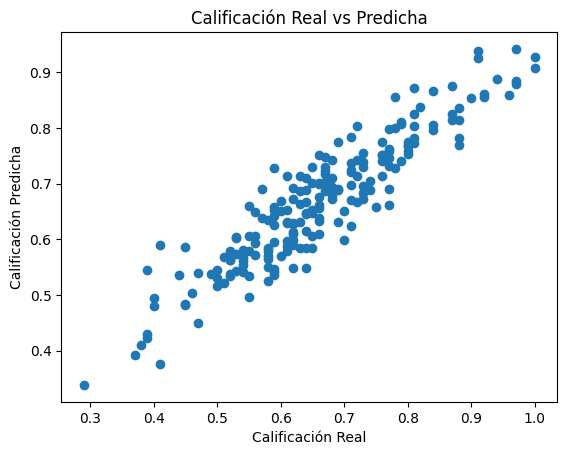

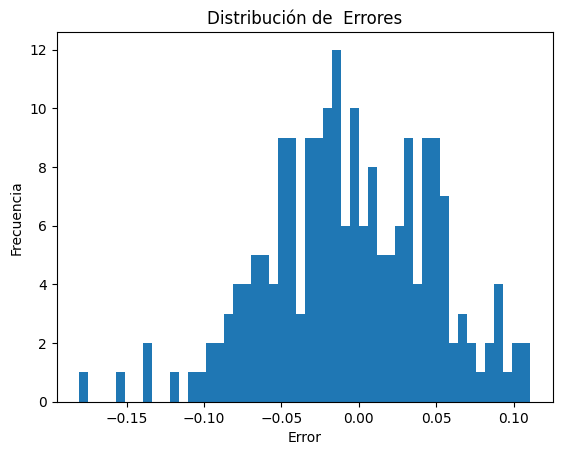

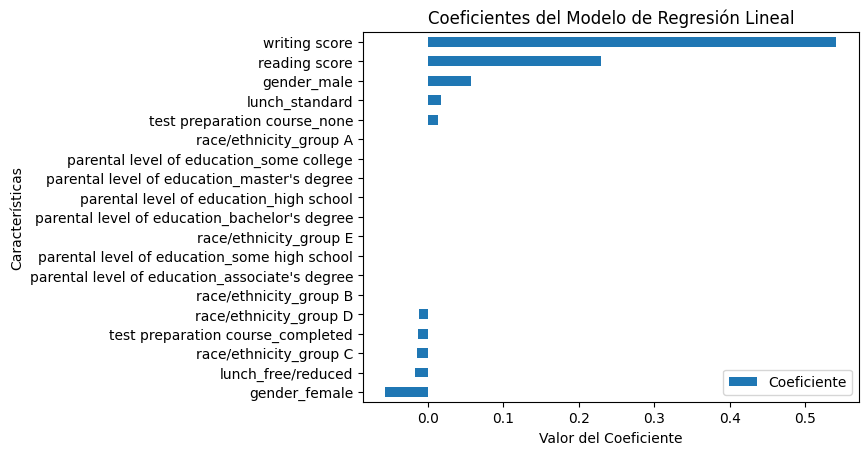

In [22]:
# ======================= Modelo de Regresión Lineal  ======================= #

shuffle = data_cleaned.sample(frac = 1)                                                        #Baraja de filas

featuresX = shuffle.drop(columns=['math score'])                                                         #Se separan features y label objetivo
labelY = shuffle['math score']

#f_Training = shuffle.iloc[:800]                                                                         #Se divide el Training Set correspondiente al 80% de las filas del Dataset Original
#df_Testing = shuffle.iloc[801:]                                                                         #Se divide el Testing Set correspondiente al 20% de las filas del Dataset Original

X_train, X_test, y_train, y_test = train_test_split(featuresX, labelY, test_size=0.2, random_state=42)


model = LinearRegression()                                                                              #Se instancia el modelo de regresión lineal

# ---> Entrenamiento 
model.fit(X_train, y_train)                                                                             #Se entrena el modelo


# ---> Evualuación
y_pred = model.predict(X_test)                                                                                          #se ejecuta el modelo

mse = mean_squared_error(y_test, y_pred)                                                                                #Se calcula MSE
r2 = r2_score(y_test, y_pred)                                                                                           #Calcula Coeficiente de Determinación R2Score    

print("╔====================================================================================================╗ ")
print(f"==== > MSE: {mse}")
print(f"==== > R^2 Score: {r2}")
print("╠====================================================================================================╣ ")

print("==== > Coeficientes de Modelo: ")
coefficients = pd.DataFrame(model.coef_, featuresX.columns, columns=['Coeficiente'])
print(coefficients)
print("╚====================================================================================================╝ ")


#--- > Graficación de evaluación

plt.scatter(y_test, y_pred)                                                                                         #Graficación de Evaluación                                        
plt.xlabel("Calificación Real")
plt.ylabel("Calificación Predicha")
plt.title("Calificación Real vs Predicha")
plt.show()


errors = y_test - y_pred                                                                                            #Graficación de Errores
plt.hist(errors, bins=50)
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Distribución de  Errores")
plt.show()

coefficients = pd.DataFrame(model.coef_, featuresX.columns, columns=['Coeficiente'])                                #Graficación de Coeficientes
coefficients = coefficients.sort_values(by='Coeficiente')
coefficients.plot(kind='barh')
plt.title("Coeficientes del Modelo de Regresión Lineal")
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Características")
plt.show()

# - = Hallazgos Adicionales del Experimento = - 

De acuerdo a los resultados arrojados por la evaluación: <br>
- La proporción de error del MSE es apenas unas décimas más alto que el del modelo original.<br>

- El Coeficiente de Determinación (R^2 Score) sigue teniendo un valor de ajuste muy bueno sin llegar a un overfitting, además menciona esta vez que el 84% de la varianza en la calificación de matemáticas se puede explicar con las variables independientes.<br>

Según los gráficos de evaluación: <br>
- El gráfico de dispersión muestra que los valores predichos siguen una distribución muy similar a la del dataframe original concentrando la mayoría de calificaciones alrededor de los 60 puntos. Además, este gráfico aún muestra la capacidad de aproximarse muy cercanamente al valor real de la calificación.<br>
- El gráfico de distribución de errores sigue mostrando una distribución muy simétrica. El modelo aún se comporta de buena manera. <br>
- Desaparecieron varios índices de coeficientes de variables indicando que no influían realmente con el resultado final.
